In [2]:
facebookimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import urllib.request as req
import urllib.request
from urllib.error import HTTPError, URLError
from urllib.request import urlopen
from bs4 import BeautifulSoup
import bs4
import requests

import folium
import googlemaps

import time
from tqdm import tqdm_notebook

import datetime
import re
from glob import glob

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
#pip install webdriver-manager

In [174]:
import os
print(os.getcwd())

C:\kimhotak13\Analysis


# Selenium

- Java Script가 동적으로 만든 데이터를 크롤링하기 위해 만들어진 모듈
    - 사이트의 다양한 HTML요소에 클릭, 키보드 입력 등 이벤트를 주기위해 이 기능을 잘 활용하면 평소에 반복적으로 하고 있는 웹 상의 업무를 자동화할 수 있다.
    
- 용도
    - 자동으로 로그인하기
    - 메일 보내기 자동화
    - 소셜 댓글 작성 등
    - ....
    
- 준비물
    - 원격 프로그램
        - Chrome Driver : "https://chromedriver.chromium.org/downloads" - 설정 - 도움말 - Chrome 정보 - 버전확인필수
        - Phantom JS
        - ...
        
    - pip install selenium

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

## 1. 간단한 사용법

### (1) 원격 웹브라우저 켜고 끄기

In [15]:
driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")
driver.get("https://naver.com")

C:\Users\acorn\AppData\Local\Temp\ipykernel_8628\1228860110.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")


In [ ]:
# <selenium.webdriver.chrome.webdriver.WebDriver (session="56b33a457cc99b9a5bf09ca9425e0c35")>

In [17]:
driver.get("https:/daum.net")

In [18]:
driver.close()

### (2) 원격 웹 브라우저 조종하기

In [19]:
driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")

C:\Users\acorn\AppData\Local\Temp\ipykernel_8628\1228860110.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")


In [20]:
driver.get("https://naver.com")

In [21]:
driver.get("https:/daum.net")

In [22]:
driver.back() # 뒤로가기

In [24]:
driver.forward() # 앞으로

In [26]:
driver.refresh() # 새로고침

In [27]:
driver.save_screenshot("data/daum1.png") # 사진 저장

True

### (3) 원격 웹 브라우저에 키보드값 전달

In [32]:
element = driver.find_element(By.ID, "q")
element.clear()
element.send_keys("노트북")

In [33]:
element.send_keys(Keys.ENTER)

## 2. 다음 로그인 자동화

In [38]:
driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")
url = "https://daum.net"

C:\Users\acorn\AppData\Local\Temp\ipykernel_8628\1941140262.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")


In [39]:
driver.get(url)

In [40]:
# 로그인 버튼 클릭

element = driver.find_element(By.CLASS_NAME, "link_login")
element.click()

In [45]:
# id, password 입력

driver.find_element(By.ID, "loginKey--1").send_keys("katohmik@nate.com")
driver.find_element(By.ID, "password--2").send_keys("sdfsdfsdf")
driver.find_element(By.CLASS_NAME, "btn_g").click()

## 3. 포털 사이트 뉴스 수집하기

In [5]:
driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")
url = "https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105"

C:\Users\acorn\AppData\Local\Temp\ipykernel_1912\2377801088.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")


In [6]:
driver.get(url)

In [7]:
ultag = driver.find_element(By.ID, "_rankingList0")
# _rankingList0 하나에 여러가지 기사가 들어가있음. 
# 그래서 element

In [10]:
litags = ultag.find_elements(By.TAG_NAME, "li") 
# <li></li>태그에 각 기사별로 묶여있음
# 기사가 여러개이므로 elements s s s s
# 혼란을 방지하기 위해서 변수명에도 s를 붙여주자

In [12]:
litags

[<selenium.webdriver.remote.webelement.WebElement (session="ea10ea86960b8d6fdef7ebfc140ed7b3", element="f794af90-1a86-43c7-bacf-afa203e54f7a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ea10ea86960b8d6fdef7ebfc140ed7b3", element="a4b682ac-8b50-4e4e-b85b-48c6e246bbed")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ea10ea86960b8d6fdef7ebfc140ed7b3", element="692983bd-6f49-482e-9544-e808c0278a29")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ea10ea86960b8d6fdef7ebfc140ed7b3", element="70d6b1e4-6de8-4e0c-b0ea-a0a27c5cf552")>,
 <selenium.webdriver.remote.webelement.WebElement (session="ea10ea86960b8d6fdef7ebfc140ed7b3", element="3133fe1c-bddd-401d-9c4e-4e4d2728dc32")>]

In [18]:
for litag in litags:
    atag = litag.find_element(By.CLASS_NAME, "list_tit")
    print(atag.text)

성매매만 2400회…동거녀한테 가스라이팅 당하고 딸까지 살 …
“마트서 돼지호박 샀다면 당장 반품하세요”…정부 당부 왜 …
[단독]"靑전기 끊을 준비하라" 민노총 받은 北지령 120 …
“소아과 의사 없음” 열세살 아들 뇌엔 피가 차오르고…[히 …
경부고속도로 기흥부근서 SUV가 도로통제 유도차량 추돌…3 …


#### 네이버 직접 검색하기

In [25]:
driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")
url = "https://www.naver.com"

C:\Users\acorn\AppData\Local\Temp\ipykernel_1912\836925516.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")


In [26]:
driver.get(url)

In [27]:
element = driver.find_element(By.ID, "query")
element.send_keys("파이썬")

In [28]:
element.send_keys(Keys.ENTER)

#### XPATH 사용하기
- By.XPATH, 'xpath 좌표'
- 좌표는 f12 후 원하는 영역 클릭 후 오른쪽 버튼 copy - copy xpath

In [33]:
driver.find_element(By.XPATH, '//*[@id="lnb"]/div[1]/div/ul/li[4]/a').click()

#### 넓은 곳에서 좁은 곳으로 접근하자
- 원하는 것이 모두 들어가 있는 큰 범위에서 조금씩 가까이

In [47]:
section = driver.find_element(By.CLASS_NAME, "_svp_list")
section # section 접근

<selenium.webdriver.remote.webelement.WebElement (session="fcb0b8e5231802399a38e0cf844271e0", element="30ae30b9-8c3d-49ec-9ab5-e6450b6043ed")>

In [49]:
items = section.find_elements(By.CLASS_NAME, "_svp_item")
items # li 접근

[<selenium.webdriver.remote.webelement.WebElement (session="fcb0b8e5231802399a38e0cf844271e0", element="2c3d72d9-8b28-4d38-be2e-07e7d6e34ca6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fcb0b8e5231802399a38e0cf844271e0", element="102b8f52-2172-4c46-8c88-b5f88c80fb58")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fcb0b8e5231802399a38e0cf844271e0", element="cf613a18-ce78-4b6a-9566-8c82c73e136e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fcb0b8e5231802399a38e0cf844271e0", element="7b701c11-3452-40ea-8851-12f7507e147c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fcb0b8e5231802399a38e0cf844271e0", element="a4caf2ff-f6d5-4086-80ef-0e0c6f701a92")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fcb0b8e5231802399a38e0cf844271e0", element="f981415c-1cae-4297-b493-ef72eda07138")>,
 <selenium.webdriver.remote.webelement.WebElement (session="fcb0b8e5231802399a38e0cf844271e0", element="a85a2bf6-a6aa-4766-a73f-cd

In [53]:
for item in items:
    title = item.find_element(By.CLASS_NAME, "total_tit")
    print(title.text)
    print(title.get_attribute("href")) # 링크 달아주는 방법
    

고려대 박사 교수님의 파이썬 명강의로 완벽 마스터!
https://adcr.naver.com/adcr?x=0AJnpc+NhhJ4t5UKO0w1Kv///w==k6BpUrVzlXkDnS806qorl0z1Dl3ma/Gl3fcbU7conEzdLNEkwg4I6DFBD6PnGTm0l//kHR2lz8qt2RuEBMOb7dbrJ211dVO1QUyJ6t0wyybQbFOhq14PiwLQx2MDor7JoiAP10ENYzW7H3aYm3BevHNjqNJymzXhzmGII46n8iQ+Ac592IrX9XzJvV4SYy5m0/rCyt3QI64kGNNWWbWDLAT8F/7vY0CtMsDAVBigyzvb2i1elxylpCoUaY0mRe6mxkG1Jo/YPQTsv/GL0eyqhABbFLsITPNHDmRqmem9id9MA0pOP7fW5tic10Q0ycjkYW965UPhZbmXvUna8cGDwZ77Nc35/2BiHAtIyNQd9b1n1XkGj2VncPDo0eEhK3tF/YjfzxnQ29kfKAmu8XZ64PwKkaZDLJW1umksQCYjfmU44wLLIGblmzbGpNx46jGW5PXQ0kuLM8FnOG281Znn0spGkSb9R5QUnmQLFkeAov850XpRQoWPF9rw/aqIGlDG3UCn0cpuhPl6xdazjOi5cm6r4CxxdGPE5jITzEGo/SL6cUPDnuuom35RZePd7A8NApo6piLzAPbODX5dlhzYLovEfd4NT8KRYYaLbMdcZAT51OBsRGh27mSXu2CfwEE7keEYdFqzas+qzF40jKKzEutsKAPgkOD3JL540Boun+c8Hk78gnoRREYStiYLQeEh8
프로그램 언어 C언어,자바,파이썬 어떻게 공부하지?
https://adcr.naver.com/adcr?x=T7YP2+k6QbVegYI6pYzqTP///w==kR6lMzKSlEaMgK8/ZN6fm1NQqHFyyue/cbG7v6V/0JpYENhg4MTWcx51suoM44HLghZkmFV6Gv3oeDAh9sTlA0STpP0S3tZO0UwR9ekptzLKVv2MmAD4Ho8W

#### 5) 온라인 카페 검색 결과 가져오기

- iframe

In [55]:
import time

driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")
url = "https://cafe.naver.com/joonggonara"
driver.get(url)

C:\Users\acorn\AppData\Local\Temp\ipykernel_1912\3764468696.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")


In [58]:
element = driver.find_element(By.ID, "topLayerQueryInput")
element.send_keys("자전거")
element.send_keys(Keys.RETURN)

time.sleep(3)

In [68]:
iframe = driver.find_element(By.ID, "cafe_main")
driver.switch_to.frame(iframe) # 페이지 맨 위의 html위치가 아니라 변수 iframe의 위치로 옮겨줌

In [76]:
articles = driver.find_elements(By.CLASS_NAME, "article-board") # article-board가 2개임
articles[1].text # 우리가 원하는건 2번쨰 article-board

'게시물 목록\n980957212\n최고급 하이엔드 자전거 핸드폰 거치대 팝니다. 자전거 싸이클 mtb 킥보드 전기자전거 스쿠터 모두 장착가능\n판매\n사진\nnew\n무어롭8\n10:17 3\n980957157\n어린이 자전거\n판매\n사진\nnew\nsoogin99\n10:17 5\n980957150\n티티카카 미니 F7 미니벨로 자전거\n판매\n사진\nnew\n광야v\n10:17 51\n980956917\n18년식 트렉 에몬다 sl6 풀 신형 울테그라 카본 로드자전거 47사이즈 판매합니다.\n판매\n사진\nnew\n자전거 나라다\n10:16 10\n980956833\n미사용 대형 브라켓 짐받이 오토바이 자전거 짐대 배달가방 거치대 선반 스틸망 팝니다\n판매\n사진\nnew\n삶은달\n10:16 1\n980956616\n2020 첼로 케인 S8 울테그라 림브레이크 카본로드자전거 + DT SWISS PR1400 림 21MM 휠셋\n판매\n사진\nnew\n어린소나기\n10:15 14\n980955615\n전기자전거 스키드FS 2대 삽니다\n판매\n사진\nnew\n브루하므\n10:10 9\n980955608\n사이먼 헬스클럽용 스핀바이크 스피닝자전거 실내자전거\n판매\n사진\nnew\nllpyusbx\n10:10 1\n980955403\n레바테인 픽시 자전거\n판매\n사진\nnew\nsoogin99\n10:09 1\n980955249\n스팅거300 MTB 자전거\n판매\n사진\nnew\nsoogin99\n10:08 5\n980954999\n세븐자전거 세븐 솔라 SLX 티타늄 XTR급 자전거\n판매 안전\n사진\nnew\n임이사랑\n10:07 9\n980954814\n권투그러브+야구글러브2+자전거짐받이\n판매\n사진\nnew\nsoogin99\n10:06 3\n980954607\n툴레 루프박스 다이나믹M800 , 윙바 ,자전거거치대 판매합니다! (루프박스 따로판매가능)\n판매 안전\n사진\nnew\n멍충이\n10:05 8\n980954285\n자전거고글 팔아요 !

In [89]:
### 첫번째 tr만 찾아주고 그 뒤로는 오류발생
# 두번째 tr부터는 a tag가 없음
# 두번째 tr부터는 article을 가진 tr이 없음
trs = articles[1].find_elements(By.TAG_NAME, "tr")
trs
for tr in trs:
    title = tr.find_element(By.CLASS_NAME, "article")
    print(title.text)
## 그러니 다른 방법을 쓰자

[<selenium.webdriver.remote.webelement.WebElement (session="7d2a3f1d4612bd41694f0791b6551be4", element="1fc76fe4-3286-4602-bf9a-f90aebb9efe9")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d2a3f1d4612bd41694f0791b6551be4", element="c94f01b1-5bc1-4003-bc35-74e1c3035805")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d2a3f1d4612bd41694f0791b6551be4", element="b8c40a41-c38e-4349-9525-bf735cc5296f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d2a3f1d4612bd41694f0791b6551be4", element="549f8d12-4c07-4bda-b740-74685205dfb2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d2a3f1d4612bd41694f0791b6551be4", element="57bdedf3-8fa7-4149-af29-92605b97eaf3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d2a3f1d4612bd41694f0791b6551be4", element="2f9e8516-b16c-4dd9-880f-8bf107a4301d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="7d2a3f1d4612bd41694f0791b6551be4", element="e47fa71a-ead8-4a83-a6d5-3c

In [91]:
# 위의 방식으로는 오류발생
# tr을 구별하는 속성값이 없음 = XPATH
# XPATH로 tr을 잡아주자
#trs = articles[1].find_elements(By.XPATH, '//*[@id="main-area"]/div[5]/table/tbody/tr[1]')
# xpath끝에 [1]로 인덱스가 붙어 있는데 우리는 1개만 찾을 것이 아니니 인덱스는 지워준다
trs = articles[1].find_elements(By.XPATH, '//*[@id="main-area"]/div[5]/table/tbody/tr')
trs
for tr in trs:
    title = tr.find_element(By.CLASS_NAME, "article")
    print(title.text)

최고급 하이엔드 자전거 핸드폰 거치대 팝니다. 자전거 싸이클 mtb 킥보드 전기자전거 스쿠터 모두 장착가능
어린이 자전거
티티카카 미니 F7 미니벨로 자전거
18년식 트렉 에몬다 sl6 풀 신형 울테그라 카본 로드자전거 47사이즈 판매합니다.
미사용 대형 브라켓 짐받이 오토바이 자전거 짐대 배달가방 거치대 선반 스틸망 팝니다
2020 첼로 케인 S8 울테그라 림브레이크 카본로드자전거 + DT SWISS PR1400 림 21MM 휠셋
전기자전거 스키드FS 2대 삽니다
사이먼 헬스클럽용 스핀바이크 스피닝자전거 실내자전거
레바테인 픽시 자전거
스팅거300 MTB 자전거
세븐자전거 세븐 솔라 SLX 티타늄 XTR급 자전거
권투그러브+야구글러브2+자전거짐받이
툴레 루프박스 다이나믹M800 , 윙바 ,자전거거치대 판매합니다! (루프박스 따로판매가능)
자전거고글 팔아요 ! 야구 라이딩 자전거 골프 썬그라스 선그라스 고글 팝니다
HEAD 접이식자전거


### (1) 페이지네이션 처리

- 위에서 만든 것들 활용

In [97]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

url = "https://cafe.naver.com/joonggonara"
driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")

try:
    driver.get(url)
    
    # 검색어 입력
    
    element = driver.find_element(By.ID, "topLayerQueryInput")
    element.send_keys("자전거")
    element.send_keys(Keys.RETURN)
    time.sleep(3)
    
    # iframe으로 접근
    
    iframe = driver.find_element(By.ID, "cafe_main")
    driver.switch_to.frame(iframe)
    
    # 한 페이지의 내용 수집
    
    articles = driver.find_elements(By.CLASS_NAME, "article-board")
    articles[1].text
    
    trs = articles[1].find_elements(By.XPATH, '//*[@id="main-area"]/div[5]/table/tbody/tr')
    for tr in trs:
        title = tr.find_element(By.CLASS_NAME, "article")
        print(title.text)
        
    # 2페이지로 이동
    page = driver.find_element(By.LINK_TEXT, "2")
    page.click()
    
    trs = articles[1].find_elements(By.XPATH, '//*[@id="main-area"]/div[5]/table/tbody/tr')
    for tr in trs:
        title = tr.find_element(By.CLASS_NAME, "article")
        print(title.text)
    
except Exception as e:
    print(e)
    
finally:
    driver.close()
    driver.quit()

C:\Users\acorn\AppData\Local\Temp\ipykernel_1912\1873865813.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")


예거 아스펜5 27.5 mtb 자전거판매합니다
캐논데일 슈퍼식스에보 105구동계 카본 로드 자전거
예거 마리온 D8 전동 구동계 디스크 로드 자전거
나이키 헤리티지86 코듀로이모자+나이키 나침판고리 희귀제품 전부새제품4.7택무/나이키조던 스우시 헤리티지 아노락 acg nsw sb/스투시 슈프림 베이프 아디다스/캠핑 골프 낚시 등산 아웃도어 노스페이스 자전거
삼천리 트레이스 어린이 자전거 16인치
Trek 트렉 본트래거 플레어 R 시티 자전거 후미등 판매합니다
삼천리자전거 전기자전거 배터리 팬텀 시티 XC FS EX
스페셜라이즈드 타막 SL6 105 + 카본힐 자전거
고급로드 사이클 Scott Sub-40 자전거
고급 로드사이클Scott Sub-40 자전거
가민워치 자전거 마운트 퀵핏 가민정품 가민 퀵핏 쿼터 턴
나이키nsw디스트로이어가죽자켓 일명 스타장 바시티자켓 전부새제품 한정판레어(사은품 나이키 리유저블쇼핑백)/나이키조던 스우시 헤리티지 아노락 acg sb/스투시 슈프림 베이프 아디다스/캠핑 골프 낚시 자전거
나이키sb포트모어2 울트라 라이트카모265사이즈+나이키 버킷햇카모 전부새제품12.5택무/나이키조던 스우시 헤리티지 아노락 acg nsw sb/아디다스 노스페이스/캠핑 골프 낚시 등산 아웃도어 밀리터리 군용 자전거
스페셜라이즈드 54 알레 스프린트 레드캔디 로드 자전거
[부산] 실내 자전거 - 프로테우스 트리오 V4 [3만원]
Message: stale element reference: element is not attached to the page document
  (Session info: chrome=111.0.5563.147)
Stacktrace:
Backtrace:
	(No symbol) [0x00BCDCE3]
	(No symbol) [0x00B639D1]
	(No symbol) [0x00A74DA8]
	(No symbol) [0x00A776FB]
	(No symbol) [0x00A775D0]
	(No symbol) [0x00A77850]
	

### 1~20페이지 

In [105]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

url = "https://cafe.naver.com/joonggonara"
driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")

try:
    driver.get(url)
    
    # 검색어 입력
    
    element = driver.find_element(By.ID, "topLayerQueryInput")
    element.send_keys("자전거")
    element.send_keys(Keys.RETURN)
    time.sleep(3)
    
    # iframe으로 접근
    iframe = driver.find_element(By.ID, "cafe_main")
    driver.switch_to.frame(iframe)
    
    for page_num in range(2, 21):
        # 한 페이지의 내용 수집
        articles = driver.find_elements(By.CLASS_NAME, "article-board")
        trs = articles[1].find_elements(By.XPATH, '//*[@id="main-area"]/div[5]/table/tbody/tr')
        for tr in trs:
            title = tr.find_element(By.CLASS_NAME, "article")
            print(title.text)
        
        # 다음페이지로 이동
        if page_num % 10 == 1:
            driver.find_element(By.CLASS_NAME, "pgR").click()
        else:
            page = driver.find_element(By.LINK_TEXT, str(page_num))
            page.click()
        
        time.sleep(2)
        
except Exception as e:
    print(e)
    
finally:
    driver.close()
    driver.quit()

C:\Users\acorn\AppData\Local\Temp\ipykernel_1912\3648173642.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")


(새상품)카스모 아동용 어반자전거 헬멧
2022 BMC 팀머신 SLR07 105 디스크 로드자전거 51사이즈 판매합니다 (메리다,트렉,자이언트)
스페셜라이즈드 에스웍 벤지 로켓레드 49사이즈 로드자전거 + 캄파보라원신형 및 풀악세사리 팝니다
자전거 MTB 22년 엘파마 룩손 L8500 티타늄 ( 가격내림)
급매ㅡ리들리 기함 로또수달 로드자전거 (풀듀라에이스9100,DT SWISS 카본휠) 49사이즈 싸게 판매합니다. 메리다 트렉 자이언트
전기자전거 벤조 26 (가격인하 39만)
트랙16인치 여아 자전거
아이언맨18인치 어린이자전거
급매) BMC SLR02 풀 울테그라 디스크 54사이즈 로드자전거 싸게 판매합니다 (메리다 트렉 자이언트)
나이키 에어조던1 레트로하이og 형광265사이즈 매장판새제품13.9택무(사은품 나이키레트로축구양말새제품)/나이키스우시 헤리티지 아노락 acg nsw sb/아디다스 스투시 슈프림 베이프/캠핑 골프 낚시 자전거 등산
메리다 500 MTB자전거 판매합니다.
메리다 에스프레소 하이브리드 자전거 팝니다.
14인치 삼천리 유아 자전거
메리다 빅세븐 800-KR 폭스샥 15인치 MTB자전거 판매합니다.
메리다 매츠 21단 MTB 자전거 팝니다.
툴레 598 자전거캐리어 블랙 2대
인테리어 알루미늄 컵홀더 자전거, 바이크, 스쿠터, 인더스트리얼 인테리어
오토바이 자전거 스피커 헬멧 스피커 미개봉 새제품 자전거 스쿠터
에어로타입)15년 메리다 리액토 400 로드자전거 xs사이즈
스카닉m180 팔아요 전기자전거 부산
상태A급 16년 캐논데일 슈퍼식스 에보 카본 로드자전거 56사이즈 팔아요.
[앱상품]엘파마 벤토르 V4000 MTB 자전거 27.5인치
[앱상품]스캇포일 로드자전거 에어로
자전거 거치대
정품 블리츠고글 자전거고글 스포츠고글 비전 비젼 판매합니다.
예거 아스펜5 27.5 mtb 자전거판매합니다
캐논데일 슈퍼식스에보 105구동계 카본 로드 자전거
예거 마리온 D8 전동 구동계 디스크 로드 자전거
나이키 헤리티지86 코듀로이모자+나이키 나

자전거 관절락 판매합니다
중고헬스기구,헬스기구, 벤치프레스, 인클라인벤치프레스, 입식자전거, 유산소 amt 스텝퍼, 천국의계단(스텝밀) 판매합니다
루나랩 슬림바이크 (실내자전거)
자전거 캐리어


## 6. 무한 스크롤

In [107]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

url = "https://naver.com"
driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")

try:
    driver.get(url)
    driver.execute_script("window.scrollTo(0, 2000);")
    time.sleep(5)
    
except Exception as e:
    print(e)
       
    

C:\Users\acorn\AppData\Local\Temp\ipykernel_1912\2567332967.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\\kimhotak13\\chromedriver")


## 7. 셀프 주유소 분석

- 실제 셀프 주유소가 저렴한지에 대한 팩트 체크
- 가장 싼 주유소는 어디인지
- https://www.opinet.co.kr


In [110]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
#pip install webdriver-manager

### (1) 데이터 수집
- 서울시 구별 주유소 가격 정보 가져오기

In [114]:
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get(url)


In [127]:
# 시 목록 가져오기
si_list_raw = driver.find_element(By.ID, "SIDO_NM0")
si_list = si_list_raw.find_elements(By.TAG_NAME, "option")
si_list

[<selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="2ef4c1d9-db57-41f2-b7b3-941c1a48542a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="ac394efa-66c9-47ce-9c74-324454cc858a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="4f7e03ec-04fb-442f-9208-094599653bb3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="33313e2a-33ce-4f65-ad29-47f84926fea7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="3ed5cc19-a8c7-4e02-ab80-80591409c169")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="124afe95-e56a-4338-8fa8-57a684c867e4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="6855617b-16a2-4bcd-8b50-b5

In [122]:
# 잘 가져왔는지 확인
for i in si_list:
    print(i.get_attribute("value"))


서울특별시
부산광역시
대구광역시
인천광역시
광주광역시
대전광역시
울산광역시
세종특별자치시
경기도
강원도
충청북도
충청남도
전라북도
전라남도
경상북도
경상남도
제주특별자치도


In [123]:
si_names = [i.get_attribute("value") for i in si_list]
si_names # '' 공백이 하나 있다. 위에 시/도라는 부분에 values값이 없기에
si_names.remove("") # 지워주자
si_names # 지워진 것을 확인

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [150]:
# 만들어진 si_names에서 값이 선택될 수 있도록 send_kyes(si_names)
tag = driver.find_element(By.ID, "SIDO_NM0")
tag.send_keys(si_names[0])

In [151]:
# 구 목록 가져오기
goo_list_raw = driver.find_element(By.ID, "SIGUNGU_NM0")
goo_list = goo_list_raw.find_elements(By.TAG_NAME, "option")
goo_list

[<selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="9e78678a-43f3-4c75-8696-bab756e751d6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="a2eec0bb-8612-4625-bd6b-223a17ced1fb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="3fd7316f-a1d9-457e-8ae2-062dfdeccc24")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="0d7a5621-4149-400b-a5fa-8da2de4d8c55")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="a19cf676-5e3f-4f39-94f0-844faa73bc56")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="fa618f68-778a-4ef0-9b7d-906d115d899d")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0a6d82d0b800d66fb2b7530fa3ef92e7", element="178529d9-8ca6-46f3-b05f-e6

In [152]:
for i in goo_list:
    print(i.get_attribute("value"))


강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구


In [153]:
goo_names = [i.get_attribute("value") for i in goo_list]
goo_names
goo_names.remove("")
goo_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [156]:
tag = driver.find_element(By.ID, "SIGUNGU_NM0")
tag.send_keys(goo_names[2])


In [158]:
#### 조회 버튼 누르기
driver.find_element(By.ID, "searRgSelect").click()

In [159]:
#### 엑셀 저장버튼 누르기

driver.find_element(By.ID, "glopopd_excel").click()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="gloppd_excel"]"}
  (Session info: chrome=111.0.5563.147)
Stacktrace:
Backtrace:
	(No symbol) [0x00EBDCE3]
	(No symbol) [0x00E539D1]
	(No symbol) [0x00D64DA8]
	(No symbol) [0x00D9019F]
	(No symbol) [0x00D903AB]
	(No symbol) [0x00DBEE62]
	(No symbol) [0x00DAAF14]
	(No symbol) [0x00DBD57C]
	(No symbol) [0x00DAACC6]
	(No symbol) [0x00D86F68]
	(No symbol) [0x00D880CD]
	GetHandleVerifier [0x01133832+2506274]
	GetHandleVerifier [0x01169794+2727300]
	GetHandleVerifier [0x0116E36C+2746716]
	GetHandleVerifier [0x00F66690+617600]
	(No symbol) [0x00E5C712]
	(No symbol) [0x00E61FF8]
	(No symbol) [0x00E620DB]
	(No symbol) [0x00E6C63B]
	BaseThreadInitThunk [0x755200F9+25]
	RtlGetAppContainerNamedObjectPath [0x76F67BBE+286]
	RtlGetAppContainerNamedObjectPath [0x76F67B8E+238]


##### 지역별(구별)로 주유소 정보를 엑셀 파일로 저장하기

In [163]:
from tqdm.notebook import tqdm

In [165]:
for goo in tqdm(goo_names):
    tag = driver.find_element(By.ID, "SIGUNGU_NM0")
    tag.send_keys(goo)
    time.sleep(2)
    
    driver.find_element(By.ID, "searRgSelect").click()
    time.sleep(2)
    
    driver.find_element(By.ID, "glopopd_excel").click()
    time.sleep(2)
    
driver.close()

  0%|          | 0/25 [00:00<?, ?it/s]

ElementClickInterceptedException: Message: element click intercepted: Element <a class="btn_type6_ex_save" href="javascript:fn_excel_download('os_btn');" id="glopopd_excel" title="새창열림:엑셀저장">...</a> is not clickable at point (287, 825). Other element would receive the click: <div id="mpopup_bg" style="position: absolute; z-index: 32001; top: 0px; left: 0px; width: 100%; height: 954px; margin: 0px; padding: 0px; border: 0px solid black; display: block;">...</div>
  (Session info: chrome=111.0.5563.147)
Stacktrace:
Backtrace:
	(No symbol) [0x00EBDCE3]
	(No symbol) [0x00E539D1]
	(No symbol) [0x00D64DA8]
	(No symbol) [0x00D952EA]
	(No symbol) [0x00D93BBA]
	(No symbol) [0x00D91EFB]
	(No symbol) [0x00D91027]
	(No symbol) [0x00D88D05]
	(No symbol) [0x00DAAECC]
	(No symbol) [0x00D88726]
	(No symbol) [0x00DAB224]
	(No symbol) [0x00DBD57C]
	(No symbol) [0x00DAACC6]
	(No symbol) [0x00D86F68]
	(No symbol) [0x00D880CD]
	GetHandleVerifier [0x01133832+2506274]
	GetHandleVerifier [0x01169794+2727300]
	GetHandleVerifier [0x0116E36C+2746716]
	GetHandleVerifier [0x00F66690+617600]
	(No symbol) [0x00E5C712]
	(No symbol) [0x00E61FF8]
	(No symbol) [0x00E620DB]
	(No symbol) [0x00E6C63B]
	BaseThreadInitThunk [0x755200F9+25]
	RtlGetAppContainerNamedObjectPath [0x76F67BBE+286]
	RtlGetAppContainerNamedObjectPath [0x76F67B8E+238]


### (2) Data Definition

In [168]:
from glob import glob

In [173]:
station_files = glob("data/oil/지역*.*")

tmp_raw = []
for f in station_files:
    tmp = pd.read_excel(f, header=2)
    tmp_raw.append(tmp)

In [175]:
len(tmp_raw)

25

In [176]:
tmp_raw

[       지역                    상호                            주소      상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  현대오일뱅크   
 1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 2   서울특별시     현대오일뱅크㈜직영 명일셀프주유소          서울 강동구 고덕로 168 (명일동)  현대오일뱅크   
 3   서울특별시      (주)소모에너지 신월셀프주유소        서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 4   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)   SK에너지   
 5   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   GS칼텍스   
 6   서울특별시          대성석유(주)길동주유소              서울 강동구 천호대로 1168   GS칼텍스   
 7   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)   SK에너지   
 8   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
 9   서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)   SK에너지   
 10  서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 11  서울특별시        (주)소모에너지 성내주유소         서울 강동구 올림픽로 578 (성내동)   GS칼텍스   
 12  서울특별시               천호현대주유소      

In [182]:
#### 데이터 프레임으로 합치기

station_raw = pd.concat(tmp_raw)
station_raw.head(50)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1672,1819,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1684,1865,-
2,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1975,1689,1866,-
3,서울특별시,(주)소모에너지 신월셀프주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1945,1695,1838,1600
4,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1695,1845,1700
5,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,Y,1945,1726,1879,1730
6,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1995,1736,1899,1700
7,서울특별시,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),SK에너지,02-442-7801,Y,-,1755,1899,1700
8,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,1908,1758,1993,-
9,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1796,1896,1741


In [183]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      453 non-null    object
 1   상호      453 non-null    object
 2   주소      453 non-null    object
 3   상표      453 non-null    object
 4   전화번호    453 non-null    object
 5   셀프여부    453 non-null    object
 6   고급휘발유   453 non-null    object
 7   휘발유     453 non-null    object
 8   경유      453 non-null    object
 9   실내등유    453 non-null    object
dtypes: object(10)
memory usage: 38.9+ KB


### (3) Data Preprocessing

In [184]:
stations = pd.DataFrame({"Oil_Store" : station_raw["상호"],
             "주소" : station_raw["주소"],
             "가격" : station_raw["휘발유"],
              "셀프" : station_raw["셀프여부"],
              "상표" : station_raw["상표"]})

In [186]:
stations.head(50)

,Oil_Store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1672,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1684,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1689,Y,현대오일뱅크
3,(주)소모에너지 신월셀프주유소,서울 강동구 양재대로 1323 (성내동),1695,Y,GS칼텍스
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1695,Y,SK에너지
5,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),1726,Y,GS칼텍스
6,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1736,N,GS칼텍스
7,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),1755,Y,SK에너지
8,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1758,Y,GS칼텍스
9,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1796,N,SK에너지


In [194]:
# "구" 파생변수 추가


#stations["주소"].split(" ") # 문자열이 아니라서 스플릿이 안된다
#stations["주소"].str.split(" ")
#stations["주소"].str.split(" ")[1] # 나온값이 시리즈라서 다시 문자열로 바꿔준다
stations["주소"].str.split(" ").str[1] # 문자열로 바꿔주니 인덱싱이 제대로 먹힌다

0     강동구
1     강동구
2     강동구
3     강동구
4     강동구
     ... 
29    강남구
30    강남구
31    강남구
32    강남구
33    강남구
Name: 주소, Length: 453, dtype: object

In [195]:
stations["구"] = [item.split()[1] for item in stations["주소"]]

In [196]:
stations.head()

,Oil_Store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1672,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1684,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1689,Y,현대오일뱅크,강동구
3,(주)소모에너지 신월셀프주유소,서울 강동구 양재대로 1323 (성내동),1695,Y,GS칼텍스,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1695,Y,SK에너지,강동구


In [197]:
stations["구"].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [198]:
len(stations["구"].unique())

25

In [199]:
##### 가격 결측치 확인

stations["가격"].unique()

array([1672, 1684, 1689, 1695, 1726, 1736, 1755, 1758, 1796, 1798, 1848,
       1978, '1635', '1645', '1659', '1668', '1677', '1685', '1695',
       '1697', '1698', '1870', '-', 1644, 1669, 1679, 1697, 1699, 1707,
       1875, 1668, 1677, 1687, 1708, 1709, 1719, 1769, 1999, 1649, 1659,
       1662, 1663, 1675, 1682, 1698, '1598', '1696', '1699', '1702',
       '1705', '1710', '1715', '1717', '1719', '1735', '1736', '1745',
       '1749', '1750', '1756', '1794', '1798', '1893', '2098', '2289',
       '2395', 1624, 1635, 1639, 1678, 1683, 1748, 1779, 1788, 1815, 1947,
       1993, 2098, 2189, 1623, 1625, 1634, 1637, 1653, 1655, 1657, 1701,
       1703, 1673, 1688, 1715, 1738, 1998, '1574', '1577', '1594', '1599',
       '1619', '1620', '1629', '1639', '1644', '1647', '1682', '1687',
       '1689', '1799', '1595', '1622', '1627', '1649', '1674', '1679',
       '1703', '2038', '2090', '2099', '2145', '2199', 1658, 1665, 1852,
       1877, 1910, 1911, 2068, 2110, 2179, 2297, 2629, '1654', '

In [203]:
stations[stations["가격"] == '-']
stations = stations[stations["가격"] != '-']

In [222]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   level_0    443 non-null    int64  
 1   index      443 non-null    int64  
 2   Oil_Store  443 non-null    object 
 3   주소         443 non-null    object 
 4   가격         443 non-null    float64
 5   셀프         443 non-null    object 
 6   상표         443 non-null    object 
 7   구          443 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.8+ KB


In [223]:
#### 가격 정보를 수치로 변환


stations["가격"] = stations["가격"].astype(float)
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   level_0    443 non-null    int64  
 1   index      443 non-null    int64  
 2   Oil_Store  443 non-null    object 
 3   주소         443 non-null    object 
 4   가격         443 non-null    float64
 5   셀프         443 non-null    object 
 6   상표         443 non-null    object 
 7   구          443 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.8+ KB


In [225]:
#### 인덱스 재조정

#stations.reset_index(inplace=True)
#del stations["index"]
#del stations["level_0"]

,level_0,index,Oil_Store,주소,가격,셀프,상표,구
0,0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1672.0,Y,현대오일뱅크,강동구
1,1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1684.0,N,현대오일뱅크,강동구
2,2,2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1689.0,Y,현대오일뱅크,강동구
3,3,3,(주)소모에너지 신월셀프주유소,서울 강동구 양재대로 1323 (성내동),1695.0,Y,GS칼텍스,강동구
4,4,4,방아다리주유소,서울 강동구 동남로 811 (명일동),1695.0,Y,SK에너지,강동구
...,...,...,...,...,...,...,...,...
438,438,29,대청주유소,서울 강남구 개포로 654 (일원동),2246.0,N,SK에너지,강남구
439,439,30,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2248.0,N,현대오일뱅크,강남구
440,440,31,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구
441,441,32,갤러리아주유소,서울 강남구 압구정로 426,2362.0,N,SK에너지,강남구


In [230]:
stations

,Oil_Store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1672.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1684.0,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1689.0,Y,현대오일뱅크,강동구
3,(주)소모에너지 신월셀프주유소,서울 강동구 양재대로 1323 (성내동),1695.0,Y,GS칼텍스,강동구
4,방아다리주유소,서울 강동구 동남로 811 (명일동),1695.0,Y,SK에너지,강동구
...,...,...,...,...,...,...
438,대청주유소,서울 강남구 개포로 654 (일원동),2246.0,N,SK에너지,강남구
439,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2248.0,N,현대오일뱅크,강남구
440,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구
441,갤러리아주유소,서울 강남구 압구정로 426,2362.0,N,SK에너지,강남구


### (4) Data Analysis

#### 1) 셀프여부에 따라 가격 차이

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

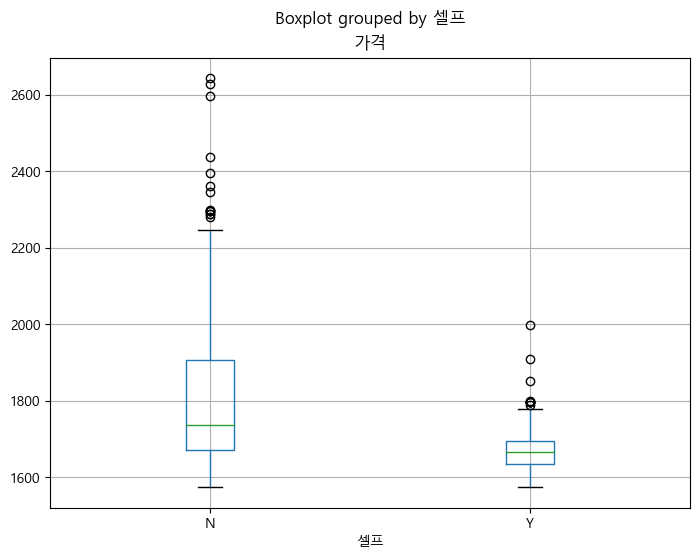

In [231]:
stations.boxplot(by="셀프", column="가격", figsize=(8,6))

#### 2) 주유소의 상표별로 얼마나 저렴한가?

<AxesSubplot:title={'center':'가격'}, xlabel='상표'>

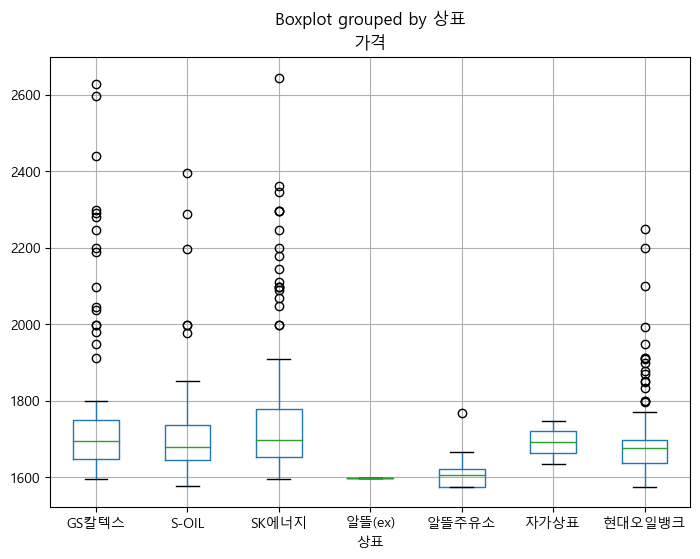

In [232]:
stations.boxplot(by="상표", column="가격", figsize=(8,6))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='상표', ylabel='가격'>

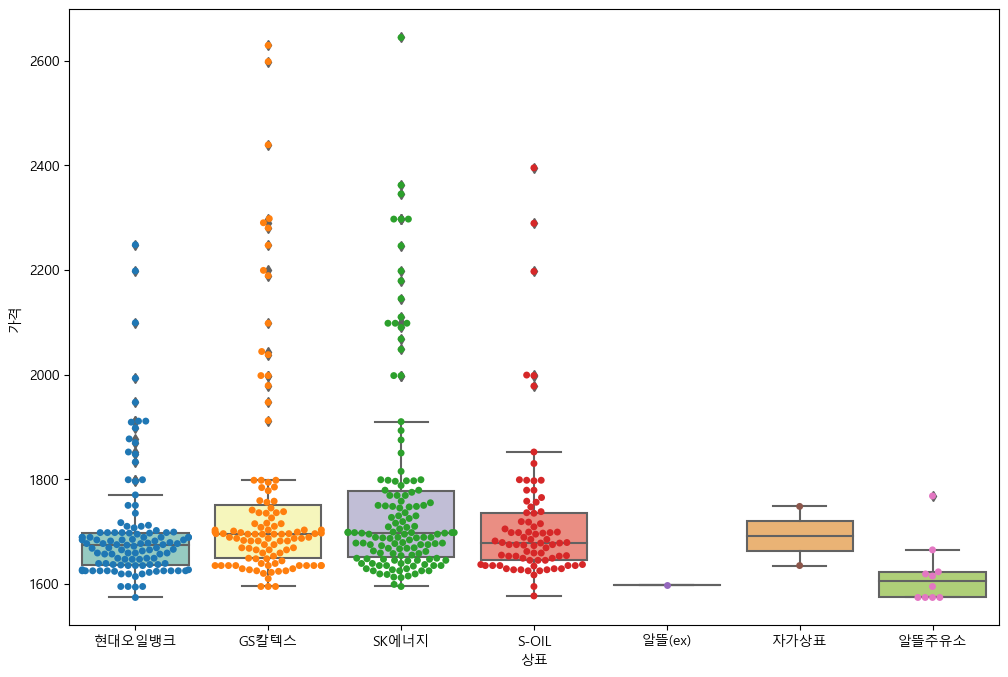

In [240]:
plt.figure(figsize = (12, 8))

sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations) # 이렇게 같이 쓸수도 있고 아래쉘처럼 따로 쓸 수도 있음

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='상표', ylabel='가격'>

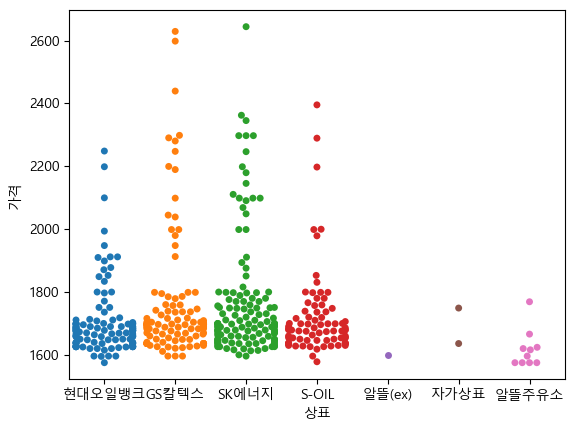

In [238]:
sns.swarmplot(x="상표", y="가격", data=stations)

#### 3) 구별 주유 가격 확인

In [241]:
######### 서울시에서 가장 주유가격이 비싼 곳은 어디인가?(10개만 확인)

In [276]:
top10 = stations.sort_values(["가격"]).tail(10)
top10

,Oil_Store,주소,가격,셀프,상표,구
238,한남지점,서울 용산구 한남대로21길 4 (한남동),2297.0,N,SK에너지,용산구
237,에너비스,서울 용산구 한남대로 82 (한남동),2297.0,N,SK에너지,용산구
366,구로주유소,서울 구로구 구로동로 137 (구로동),2298.0,N,GS칼텍스,구로구
440,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구
441,갤러리아주유소,서울 강남구 압구정로 426,2362.0,N,SK에너지,강남구
96,양재최고주유소,서울 서초구 매헌로 72 (양재동),2395.0,N,S-OIL,서초구
272,필동주유소,서울 중구 퇴계로 196 (필동2가),2439.0,N,GS칼텍스,중구
442,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
239,서계주유소,서울 용산구 청파로 367 (청파동),2629.0,N,GS칼텍스,용산구
273,서남주유소,서울 중구 통일로 30,2644.0,N,SK에너지,중구


In [281]:
storeloc = {"한남지점" : [37.5347327, 127.0060948],
                        "에너비스" : [37.5360412, 127.0061276],
                        "구로주유소" : [37.49096, 126.883648],
                        "SK논현주유소" : [37.5186368, 127.028238],
                        "갤러리아주유소" : [37.5267844, 127.043539],
                        "양재최고주유소" : [37.4671577, 127.034715],
                        "필동주유소" :  [37.560912, 126.9937135],
                        "(주)만정에너지 삼보주유소" : [37.5115207, 127.0471716],
                        "서계주유소" : [37.5523286, 126.9689462],
                        "서남주유소" : [37.5583749, 126.9720939]
                       }

In [289]:
dfstore1 = pd.DataFrame(storeloc)
dfstore2 = dfstore1.T
dfstore2.columns = ["위도", "경도"]
top10oil = dfstore2
top10oil

,위도,경도
한남지점,37.534733,127.006095
에너비스,37.536041,127.006128
구로주유소,37.490960,126.883648
SK논현주유소,37.518637,127.028238
갤러리아주유소,37.526784,127.043539
양재최고주유소,37.467158,127.034715
필동주유소,37.560912,126.993713
(주)만정에너지 삼보주유소,37.511521,127.047172
서계주유소,37.552329,126.968946
서남주유소,37.558375,126.972094


In [ ]:
한남지점 37.5347327, 127.0060948
에너비스 37.5360412 127.0061276
구로주유소 37.49096 126.883648
SK논현주유소 37.5186368 127.028238
갤러리아주유소 37.5267844 127.043539
양재최고주유소 37.4671577 127.034715
필동주유소 37.560912 126.9937135
(주)만정에너지 삼보주유소 37.5115207 127.0471716
서계주유소 37.5523286 126.9689462
서남주유소 37.5583749 126.9720939

In [305]:
seoultop10 = pd.merge(top10, top10oil, left_on = ["Oil_Store"], right_index=True) 
seoultop10

,Oil_Store,주소,가격,셀프,상표,구,위도,경도
238,한남지점,서울 용산구 한남대로21길 4 (한남동),2297.0,N,SK에너지,용산구,37.534733,127.006095
237,에너비스,서울 용산구 한남대로 82 (한남동),2297.0,N,SK에너지,용산구,37.536041,127.006128
366,구로주유소,서울 구로구 구로동로 137 (구로동),2298.0,N,GS칼텍스,구로구,37.490960,126.883648
440,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구,37.518637,127.028238
441,갤러리아주유소,서울 강남구 압구정로 426,2362.0,N,SK에너지,강남구,37.526784,127.043539
96,양재최고주유소,서울 서초구 매헌로 72 (양재동),2395.0,N,S-OIL,서초구,37.467158,127.034715
272,필동주유소,서울 중구 퇴계로 196 (필동2가),2439.0,N,GS칼텍스,중구,37.560912,126.993713
442,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구,37.511521,127.047172
239,서계주유소,서울 용산구 청파로 367 (청파동),2629.0,N,GS칼텍스,용산구,37.552329,126.968946
273,서남주유소,서울 중구 통일로 30,2644.0,N,SK에너지,중구,37.558375,126.972094


In [311]:
seoultop10 = seoultop10.reset_index(drop = True)
seoultop10

,Oil_Store,주소,가격,셀프,상표,구,위도,경도
0,한남지점,서울 용산구 한남대로21길 4 (한남동),2297.0,N,SK에너지,용산구,37.534733,127.006095
1,에너비스,서울 용산구 한남대로 82 (한남동),2297.0,N,SK에너지,용산구,37.536041,127.006128
2,구로주유소,서울 구로구 구로동로 137 (구로동),2298.0,N,GS칼텍스,구로구,37.490960,126.883648
3,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구,37.518637,127.028238
4,갤러리아주유소,서울 강남구 압구정로 426,2362.0,N,SK에너지,강남구,37.526784,127.043539
5,양재최고주유소,서울 서초구 매헌로 72 (양재동),2395.0,N,S-OIL,서초구,37.467158,127.034715
6,필동주유소,서울 중구 퇴계로 196 (필동2가),2439.0,N,GS칼텍스,중구,37.560912,126.993713
7,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구,37.511521,127.047172
8,서계주유소,서울 용산구 청파로 367 (청파동),2629.0,N,GS칼텍스,용산구,37.552329,126.968946
9,서남주유소,서울 중구 통일로 30,2644.0,N,SK에너지,중구,37.558375,126.972094


In [242]:
####### 서울시에서 가장 주유가격이 싼 곳은 어디인가?(10개만 확인)

In [277]:
min10 = stations.sort_values(["가격"]).head(10)
min10

,Oil_Store,주소,가격,셀프,상표,구
290,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1574.0,Y,현대오일뱅크,강서구
287,목화주유소,서울 강서구 국회대로 251 (화곡동),1574.0,Y,알뜰주유소,강서구
288,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1574.0,N,알뜰주유소,강서구
166,양천구주유소,서울 양천구 국회대로 275 (목동),1574.0,Y,알뜰주유소,양천구
289,화곡역주유소,서울 강서구 강서로 154 (화곡동),1574.0,Y,알뜰주유소,강서구
167,현대주유소,서울 양천구 남부순환로 372 (신월동),1577.0,Y,S-OIL,양천구
168,형산석유(주)원주유소,서울 양천구 남부순환로 408,1594.0,N,현대오일뱅크,양천구
379,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구
347,(주)한미석유구로그린주유소,서울 구로구 구로중앙로 76 (구로동),1595.0,Y,GS칼텍스,구로구
189,영등포제일셀프주유소,서울 영등포구 가마산로 379,1595.0,Y,현대오일뱅크,영등포구


In [293]:
storeloc2 = {
            "이케이에너지(주) 강서주유소" :[37.5491634, 126.8469964],
            "목화주유소" : [37.5300403, 126.8629825],
            "뉴신정주유소" :  [37.5315796, 126.8560524],
            "양천구주유소" :  [37.5303149, 126.8655168],
            "곡역주유소" : [37.5407186, 126.8415303],
            "현대주유소" :    [37.5338727, 126.8292625],
            "형산석유(주)원주유소" :  [37.5311389, 126.8309818],
            "화랑대주유소" :  [37.6195772, 127.0806305],
            "(주)한미석유구로그린주유소" :  [37.4963064, 126.8884444],
            "영등포제일셀프주유소" :  [37.5023476, 126.8995031]
            }

In [303]:
dfstore3 = pd.DataFrame(storeloc2)
dfstore4 = dfstore3.T
dfstore4.columns = ["위도","경도"]
min10oil = dfstore4
min10oil

,위도,경도
이케이에너지(주) 강서주유소,37.549163,126.846996
목화주유소,37.530040,126.862983
뉴신정주유소,37.531580,126.856052
양천구주유소,37.530315,126.865517
곡역주유소,37.540719,126.841530
현대주유소,37.533873,126.829262
형산석유(주)원주유소,37.531139,126.830982
화랑대주유소,37.619577,127.080630
(주)한미석유구로그린주유소,37.496306,126.888444
영등포제일셀프주유소,37.502348,126.899503


In [319]:
seoulmin10 = pd.merge(min10, min10oil, left_on = ["Oil_Store"], right_index=True) 
seoulmin10 = seoulmin10.reset_index(drop = True)
seoulmin10

,Oil_Store,주소,가격,셀프,상표,구,위도,경도
0,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1574.0,Y,현대오일뱅크,강서구,37.549163,126.846996
1,목화주유소,서울 강서구 국회대로 251 (화곡동),1574.0,Y,알뜰주유소,강서구,37.530040,126.862983
2,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1574.0,N,알뜰주유소,강서구,37.531580,126.856052
3,양천구주유소,서울 양천구 국회대로 275 (목동),1574.0,Y,알뜰주유소,양천구,37.530315,126.865517
4,현대주유소,서울 양천구 남부순환로 372 (신월동),1577.0,Y,S-OIL,양천구,37.533873,126.829262
5,형산석유(주)원주유소,서울 양천구 남부순환로 408,1594.0,N,현대오일뱅크,양천구,37.531139,126.830982
6,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구,37.619577,127.080630
7,(주)한미석유구로그린주유소,서울 구로구 구로중앙로 76 (구로동),1595.0,Y,GS칼텍스,구로구,37.496306,126.888444
8,영등포제일셀프주유소,서울 영등포구 가마산로 379,1595.0,Y,현대오일뱅크,영등포구,37.502348,126.899503


#### 4) 구별로 평균값을 산출하여 지도에 표시

In [248]:
goo_meanprice = stations.groupby("구").mean()["가격"]

In [257]:
goo_meanprice.info()

<class 'pandas.core.series.Series'>
Index: 25 entries, 강남구 to 중랑구
Series name: 가격
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 956.0+ bytes


In [250]:
import folium
import googlemaps

In [254]:
gmaps_key = "AIzaSyDmd1WurzaRYWIcH_**************"
googlemaps.Client(key=gmaps_key) 
gmaps = googlemaps.Client(key=gmaps_key)

In [321]:
geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map.choropleth(geo_data=geo_path, data=df["가격"], key_on="feature.id",
              columns=[df["가격"]], fill_color="PuRd")

folium.GeoJson(
    geo_path,
    tooltip=folium.features.GeoJsonTooltip(fields=["name"], aliases=[""], localize=True)).add_to(map)


map

C:\Users\acorn\AppData\Roaming\Python\Python39\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [259]:
df=pd.DataFrame(goo_meanprice)
df

,가격
구,
강남구,1916.500000
강동구,1759.142857
강북구,1642.750000
강서구,1680.545455
관악구,1709.571429
광진구,1668.000000
구로구,1722.350000
금천구,1661.181818
노원구,1679.400000


#### 5) 주유 가격 상/하위 10개씩을 지도에 표시

In [ ]:
import folium
import googlemaps


gmaps_key = "AIzaSyDmd1WurzaRYWIcH_*************"
googlemaps.Client(key=gmaps_key) 
gmaps = googlemaps.Client(key=gmaps_key)

In [317]:
?folium.Icon

In [320]:
map = folium.Map(location=[37.4987464, 127.03169], zoom_start=10)

for i in seoultop10.index:
    folium.Marker(location = [seoultop10["위도"][i],
                            seoultop10["경도"][i]],
                  icon= folium.Icon(color="red", icon="star"),
                  popup=seoultop10["Oil_Store"][i]).add_to(map)
    
for i in seoulmin10.index:
    folium.Marker(location = [seoulmin10["위도"][i],
                            seoulmin10["경도"][i]],
                  icon= folium.Icon(color="red", icon="info-sign"),
                  popup=seoulmin10["Oil_Store"][i]).add_to(map)

map

In [ ]:
####### 서울시에서 가장 주유가격이 비싼 곳은 어디인가?(10개)
stations.sort_values(by="가격", ascending = False).head(10)

####### 서울시에서 가장 주유가격이 싼 곳은 어디인가?(10개)
stations.sort_values(by="가격").head(10)

###### 4) 구별로 평균값을 산출하여 지도에 표시
import folium

station_loc = stations.groupby("구").mean("가격").index
station_loc


geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"

map = folium.Map(location=[37.500195,127.0229206], zoom_start=10)

map.choropleth(geo_data=geo_path, data=stations_price["가격"], key_on = "feature.id", 
               columns = [stations_price.index, stations_price["가격"]], fill_color = "RdBu")


folium.GeoJson(
    geo_path,
    tooltip=folium.features.GeoJsonTooltip(fields=["name"], aliases=[""], localize=True)).add_to(map)

map


## 5) 주유 가격 상/하위 10개씩을 지도에 표시

import googlemaps

gmaps_key = "AIzaSyDmd1WurzaRYWIcH_*********************"                           ## 나의 인증키
gmaps = googlemaps.Client(key = gmaps_key)                                   # 구글에 접속하는 주소


station_expensive = stations.sort_values(by="가격", ascending = False).head(10) 
station_cheap = stations.sort_values(by="가격", ascending = False).tail(10) 

station_cheap.head()



ex_latitude = []                      # 경도를 받아올 빈 리스트
ex_longitude = []                     # 위도를 받아올 빈 리스트
ch_latitude = []
ch_longitude = []


for name in station_expensive["주소"]:
    
    place = gmaps.geocode(name, language="ko")[0]

    ex_latitude.append(place["geometry"]["location"]["lat"])
    ex_longitude.append(place["geometry"]["location"]["lng"])
    
station_expensive["경도"] = ex_latitude
station_expensive["위도"] = ex_longitude

for name in station_cheap["주소"]:
    
    place = gmaps.geocode(name, language="ko")[0]

    ch_latitude.append(place["geometry"]["location"]["lat"])
    ch_longitude.append(place["geometry"]["location"]["lng"])
    
station_cheap["경도"] = ch_latitude
station_cheap["위도"] = ch_longitude


map = folium.Map(location=[37.500195,127.0229206], zoom_start=10)

for i in station_cheap.index:
    folium.Marker(location=[station_cheap["경도"][i], station_cheap["위도"][i]], 
                  icon=folium.Icon(color="blue", icon="star"), popup = station_cheap["Oil_store"][i]).add_to(map)

for i in station_expensive.index:
    folium.Marker(location=[station_expensive["경도"][i], station_expensive["위도"][i]], 
                  icon=folium.Icon(color="red", icon="star"), popup = station_expensive["Oil_store"][i]).add_to(map)
    
map